## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np
from random import randint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [21]:
# Combine the data into a single dataset
merged_raw_data = mouse_metadata.merge(study_results, how = 'inner')

# Display the data table for preview
merged_raw_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Check the number of mice.
mice_count = merged_raw_data['Mouse ID'].nunique()
print(f'There are {mice_count} in current dataset.')

There are 249 in current dataset.


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_raw_data[merged_raw_data[['Mouse ID', 'Timepoint']].duplicated()]

#putting IDs in a list as this method will cleanse dataframes whether there is only one or more than one duplicate mouse in data.
duplicate_mouse_ID_list = list(duplicate_mouse['Mouse ID'].unique())

print(f'Duplicate Mouse ID(s) are {duplicate_mouse_ID_list}')

Duplicate Mouse ID(s) are ['g989']


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
# will work if more than one duplicate mouse.

duplicate_mouse_data = merged_raw_data[merged_raw_data['Mouse ID'].isin(duplicate_mouse_ID_list)]
print(f'All the duplicate mouse records')
display(duplicate_mouse_data)

All the duplicate mouse records


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleansed_df = merged_raw_data[~merged_raw_data['Mouse ID'].isin(duplicate_mouse_ID_list)]

print(f'Complete data with duplicate mouse data removed')
display(cleansed_df)

Complete data with duplicate mouse data removed


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Check the number of mice in the clean DataFrame.
mice_count = cleansed_df['Mouse ID'].nunique()
print(f'There are {mice_count} in cleansed dataset.')

There are 248 in cleansed dataset.


## Summary Statistics

In [26]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
groupbyVar =cleansed_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'] 

summary_df = groupbyVar.describe()[['mean']]
summary_df['Median Tumor Volume'] = groupbyVar.median()
summary_df['Variance Tumor Volume'] =groupbyVar.var()
summary_df['Standard Deviation Tumor Volume'] = groupbyVar.std()
summary_df['Standard Error of the Mean (SEM) Tumor Volume'] = groupbyVar.sem()
summary_df = summary_df.rename(columns = {'mean': 'Mean Tumor Volume'})

print(f'Summary Statistics of Data by creating and building dataframe')
display(summary_df)

Summary Statistics of Data by creating and building dataframe


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error of the Mean (SEM) Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

option2 = cleansed_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
option2 = option2.rename(columns = {'mean': 'MeanTumor Volume', 'median': 'Median Tumor Volume', 
                                    'var': 'Variance Tumor Volume', 'std': 'Standard Deviation Tumor Volume',
                                    'sem': 'Standard Error of the Mean (SEM) Tumor Volume' })
option2 = option2.copy()

print(f'Summary Statistics of Data using .agg() function')
display(option2)

Summary Statistics of Data using .agg() function


,MeanTumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error of the Mean (SEM) Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

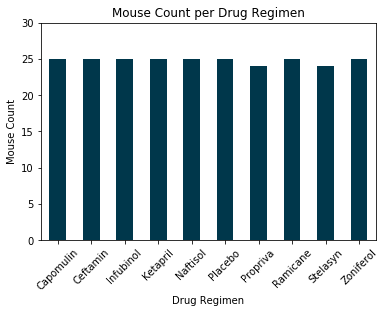

In [28]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
# Note: this plot will be identical to the one that uses Pyplot

permouse_df = pd.DataFrame(cleansed_df.groupby(['Drug Regimen'])['Mouse ID'].nunique())
pandas_bar = permouse_df.plot.bar(title = 'Mouse Count per Drug Regimen', rot=45, legend = False, color = '#00374b')
pandas_bar.set_ylabel('Mouse Count')
plt.ylim(0,30)
                                  
pandas_bar

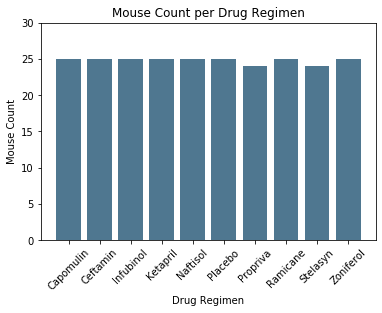

In [29]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
##  Note: this plot will be identical to the one that uses Pandas

plt.bar(permouse_df.index, permouse_df['Mouse ID'].tolist(), color='#235574', alpha=0.8, align="center")
plt.title('Mouse Count per Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel('Mouse Count')
plt.ylim(0,30)
plt.xticks(rotation=45)

plt.show()

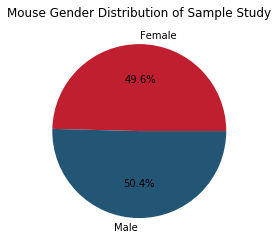

In [30]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
## Note: this plot will be identical to the one that uses Pyplot

piecolors = ['#bf1f2e', '#235574']
pietitle = 'Mouse Gender Distribution of Sample Study'
autopct = "%1.1f%%"

gender_df = pd.DataFrame(cleansed_df.groupby(['Sex'])['Mouse ID'].nunique())                   
pandas_pie = gender_df.plot.pie(y = 'Mouse ID', title = pietitle, legend = False, 
                                colors = piecolors, autopct=autopct, rot = 45)                          
pandas_pie.set_ylabel('')

plt.show()



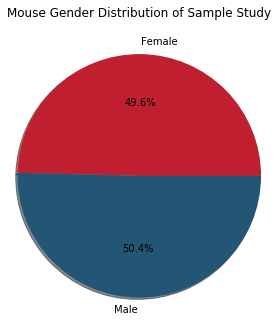

In [31]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
##  Note: this plot will be identical to the one that uses Pandas
plt.pie(cleansed_df.groupby(['Sex'])['Mouse ID'].nunique(), labels = gender_df.index,
        autopct=autopct, shadow=True, startangle=0, colors = piecolors, radius = 1.4)
plt.title(pietitle, pad = 50)

plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'
# Start by getting the last (latest) timepoint for each mouse
maxtimePerMouse = pd.DataFrame(cleansed_df.groupby(['Mouse ID'])['Timepoint'].max())

drugList = ['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finalTumorVolume_df = maxtimePerMouse.merge(cleansed_df, how = 'inner', on = ['Mouse ID', 'Timepoint'])

#filter out unwanted columns and rows based on durg list
finalTumorVolume_df = finalTumorVolume_df[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]
finalTumorVolume_df = finalTumorVolume_df.loc[finalTumorVolume_df['Drug Regimen'].isin(drugList)]

#to prevent dataframe view and chained indexing
finalTumorVolume_df = finalTumorVolume_df.copy()

print(f'Dataframe of last Timepoint for Mice in Drug list')
display(finalTumorVolume_df)



Dataframe of last Timepoint for Mice in Drug list


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
3,a275,45,Ceftamin,62.999356
6,a411,45,Ramicane,38.407618
7,a444,45,Ramicane,43.047543
...,...,...,...,...
238,y769,45,Ceftamin,68.594745
239,y793,45,Capomulin,31.896238
240,y865,45,Ceftamin,64.729837
244,z578,45,Ramicane,30.638696


In [42]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset     
    # Determine outliers using upper and lower bounds
    # Create empty list to fill with tumor vol data (for plotting)
#__________________________________________________   


#creating a dictionary of dataframes and stats for each drug.    
drug_dict = {}
outlier_df = pd.DataFrame({})

#for loop creates dataframe and dictionary keys based on drug name.

for drug in drugList:
    drug_dict[drug] = pd.DataFrame(finalTumorVolume_df.loc[finalTumorVolume_df['Drug Regimen']== drug, 
                                                           ['Drug Regimen','Tumor Volume (mm3)']])
    
#calculates and adds stats to dictionary outside dataframe for easy retrieval    
    quartiles = drug_dict[drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    drug_dict.update({drug + ' lower quartile': quartiles[0.25]})
    drug_dict.update({drug + ' upper quartile': quartiles[0.75]})
    drug_dict.update({drug + ' iqr': drug_dict[drug + ' upper quartile'] - drug_dict[drug + ' lower quartile']})
    drug_dict.update({drug + ' lower bound' : drug_dict[drug + ' lower quartile'] - (1.5 * drug_dict[drug + ' iqr'])})
    drug_dict.update({drug +  ' upper bound' : drug_dict[drug + ' upper quartile'] + (1.5 * drug_dict[drug + ' iqr'])})

#adds boolean to each record in dataframe to see if it is an outlier either by the upper or lower bound.
    drug_dict[drug]['Outlier Lower Bound'] = drug_dict[drug]['Tumor Volume (mm3)'] < drug_dict[drug + ' lower bound']
    drug_dict[drug]['Outlier Upper Bound'] = drug_dict[drug]['Tumor Volume (mm3)'] > drug_dict[drug + ' upper bound']
    outlier = drug_dict[drug].loc [(drug_dict[drug]['Outlier Lower Bound'] == True) | 
                                    (drug_dict[drug]['Outlier Upper Bound'] == True)]
    
#append in case there are outliers on more than one type of drug
    outlier_df = outlier_df.append(outlier)
    
    #print outlier results
if outlier_df.empty:
    print(f'There are no outliers in the data samples.')
else:
    print(f'{len(outlier_df)} outlier(s) found in the data.')
    display(outlier_df)
    

1 outlier(s) found in the data.


,Drug Regimen,Tumor Volume (mm3),Outlier Lower Bound,Outlier Upper Bound
31,Infubinol,36.321346,True,False


In [43]:
#find both max and min values for plot to capture potential outliers
#plots will flexibly display if any outliers found

maxPlotValue = max(outlier_df['Tumor Volume (mm3)'].max() + 10, 80)
minPlotValue = min(outlier_df['Tumor Volume (mm3)'].min() - 10, 10)

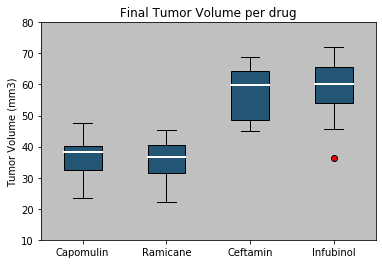

Capomulin Upper Bound is 51.832
Capomulin Upper Quartile is 40.159
Capomulin IQR is 7.782
Capomulin Lower Quartile 32.377
Capomulin Lower Bound is 20.705

Ramicane Upper Bound is 54.307
Ramicane Upper Quartile is 40.659
Ramicane IQR is 9.099
Ramicane Lower Quartile 31.56
Ramicane Lower Bound is 17.913

Ceftamin Upper Bound is 87.666
Ceftamin Upper Quartile is 64.3
Ceftamin IQR is 15.578
Ceftamin Lower Quartile 48.722
Ceftamin Lower Bound is 25.355

Infubinol Upper Bound is 82.741
Infubinol Upper Quartile is 65.526
Infubinol IQR is 11.477
Infubinol Lower Quartile 54.049
Infubinol Lower Bound is 36.833




In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
collection = []
xlabels = []
resultsstring = ''

for drug in drugList:
    collection.append(drug_dict[drug]['Tumor Volume (mm3)'].tolist())
    xlabels.append(drug)
    resultsstring += (drug) + ' Upper Bound is ' + str(round(drug_dict[drug + " upper bound"],3)) + '\n'
    resultsstring += (drug) + ' Upper Quartile is ' + str(round(drug_dict[drug + " upper quartile"],3)) + '\n'
    resultsstring += (drug) + ' IQR is ' + str(round(drug_dict[drug + " iqr"],3)) + '\n'
    resultsstring += (drug) + ' Lower Quartile ' + str(round(drug_dict[drug + " lower quartile"],3)) + '\n'
    resultsstring += (drug) + ' Lower Bound is ' + str(round(drug_dict[drug + " lower bound"],3)) + '\n\n'


fig1, ax1 = plt.subplots()
ax1.boxplot(collection, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='r')
                 , medianprops= dict(color='white', linewidth=2)
                 , boxprops = dict(facecolor = '#235574'))
ax1.set_xticklabels(xlabels)
ax1.set(facecolor = '#c0c0c0' )

ax1.set_title('Final Tumor Volume per drug')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.ylim(minPlotValue, maxPlotValue)

plt.show()

print(f'{resultsstring}')

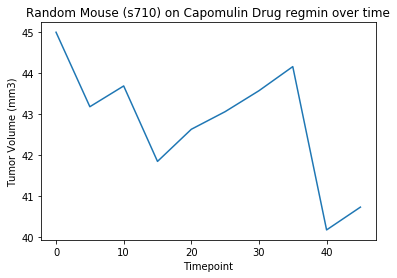

In [49]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
#get random mouse from study on Capomulin  
#you can re-run cell and get different mice each time on drug
sampleDrug = 'Capomulin'


singleMouse = cleansed_df.loc[cleansed_df['Drug Regimen'] == sampleDrug]
singleMouseID = singleMouse['Mouse ID'].unique()
randomID = randint(0, len(singleMouseID)-1)
singleMouseData = singleMouse.loc[singleMouse['Mouse ID'] == singleMouseID[randomID]]

plt.figure()
plt.plot(singleMouseData['Timepoint'], singleMouseData['Tumor Volume (mm3)'])
plt.title('Random Mouse (' + singleMouseID[randomID] + ') on ' + sampleDrug + ' Drug regmin over time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

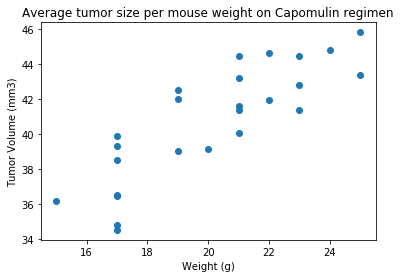

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
avgTumorVol = singleMouse.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()
tumorVol_df = pd.DataFrame(avgTumorVol)
tumorVol_df= tumorVol_df.reset_index()

xScatter = tumorVol_df['Weight (g)']
yScatter = tumorVol_df['Tumor Volume (mm3)']
plt.scatter(xScatter, yScatter)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Average tumor size per mouse weight on {sampleDrug} regimen')
plt.show()

## Correlation and Regression

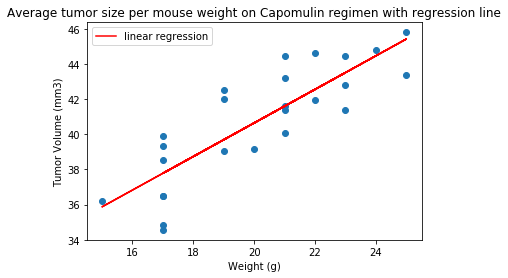

Pearson's r correlation coefficient on data is 0.8419.
The regression line equations is y = 0.9544396890241045(x) + 21.552160532685015
p-value = 1.3225722434712642e-07; Standard error = 0.1275435903320134


In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
slope, intercept, r_value, p_value, std_err = st.linregress(xScatter, yScatter)

plt.plot(xScatter, yScatter, 'o')
plt.plot(xScatter, intercept + slope*xScatter, 'r', label='linear regression')
plt.legend()
plt.title(f'Average tumor size per mouse weight on {sampleDrug} regimen with regression line')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

pearsonr = st.pearsonr(xScatter, yScatter)
corrCoefficient = round(pearsonr[0],4)


print(f"Pearson's r correlation coefficient on data is {corrCoefficient}.")
print(f"The regression line equations is y = {slope}(x) + {intercept}")
print(f"p-value = {p_value}; Standard error = {std_err}")     
      